In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("metadata.csv")

In [5]:
df.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


In [6]:
df.describe()

,lesion_id,age,fitspatrick,diameter_1,diameter_2
count,2298.000000,2298.000000,1494.000000,1494.000000,1494.000000
mean,1529.933856,60.464752,2.265730,11.897055,8.852209
std,1196.285644,15.894866,0.729029,8.634492,5.797036
min,6.000000,6.000000,1.000000,0.000000,0.000000
25%,720.500000,52.000000,2.000000,7.000000,5.000000
50%,1297.000000,62.000000,2.000000,10.000000,8.000000
75%,1782.750000,72.000000,3.000000,15.000000,10.000000
max,4820.000000,94.000000,6.000000,100.000000,70.000000


In [7]:
df.isnull().sum()

patient_id               0
lesion_id                0
smoke                  804
drink                  804
background_father      818
background_mother      822
age                      0
pesticide              804
gender                 804
skin_cancer_history    804
cancer_history         804
has_piped_water        804
has_sewage_system      804
fitspatrick            804
region                   0
diameter_1             804
diameter_2             804
diagnostic               0
itch                     0
grew                     0
hurt                     0
changed                  0
bleed                    0
elevation                0
img_id                   0
biopsed                  0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   int64  
 2   smoke                1494 non-null   object 
 3   drink                1494 non-null   object 
 4   background_father    1480 non-null   object 
 5   background_mother    1476 non-null   object 
 6   age                  2298 non-null   int64  
 7   pesticide            1494 non-null   object 
 8   gender               1494 non-null   object 
 9   skin_cancer_history  1494 non-null   object 
 10  cancer_history       1494 non-null   object 
 11  has_piped_water      1494 non-null   object 
 12  has_sewage_system    1494 non-null   object 
 13  fitspatrick          1494 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           1494 non-null   f

In [9]:
missing_val = df.isnull().sum()
missing_per = (missing_val/len(df))*100

print(missing_per)

patient_id              0.000000
lesion_id               0.000000
smoke                  34.986945
drink                  34.986945
background_father      35.596171
background_mother      35.770235
age                     0.000000
pesticide              34.986945
gender                 34.986945
skin_cancer_history    34.986945
cancer_history         34.986945
has_piped_water        34.986945
has_sewage_system      34.986945
fitspatrick            34.986945
region                  0.000000
diameter_1             34.986945
diameter_2             34.986945
diagnostic              0.000000
itch                    0.000000
grew                    0.000000
hurt                    0.000000
changed                 0.000000
bleed                   0.000000
elevation               0.000000
img_id                  0.000000
biopsed                 0.000000
dtype: float64


35% missing value percentage is moderate — too high to ignore, but not high enough to drop entire columns.

Therefore, for categorical/boolean columns will be filled with 'False'.
numerical columns will be filled with 'median' values.
and rest of the columns with 'Unknown'.

In [10]:
# categorical and boolean columns to be filled with unknown/false values

cat_fill_unknown = ['background_father', 'background_mother','gender']

bool_fill_false = ['smoke','drink','pesticide','skin_cancer_history',
                   'cancer_history', 'has_piped_water', 'has_sewage_system']

# columns to be filled with median values

num_fill_med = ['fitspatrick','diameter_1','diameter_2']

#filling cat columns with unknown

df[cat_fill_unknown] = df[cat_fill_unknown].fillna('Unknown')

#filling boolean columns with false

df[bool_fill_false] = df[bool_fill_false].fillna('False')

#filling numerical cols with median values
for col in num_fill_med:
    df[col].fillna(df[col].median(), inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   int64  
 2   smoke                2298 non-null   object 
 3   drink                2298 non-null   object 
 4   background_father    2298 non-null   object 
 5   background_mother    2298 non-null   object 
 6   age                  2298 non-null   int64  
 7   pesticide            2298 non-null   object 
 8   gender               2298 non-null   object 
 9   skin_cancer_history  2298 non-null   object 
 10  cancer_history       2298 non-null   object 
 11  has_piped_water      2298 non-null   object 
 12  has_sewage_system    2298 non-null   object 
 13  fitspatrick          2298 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           2298 non-null   f

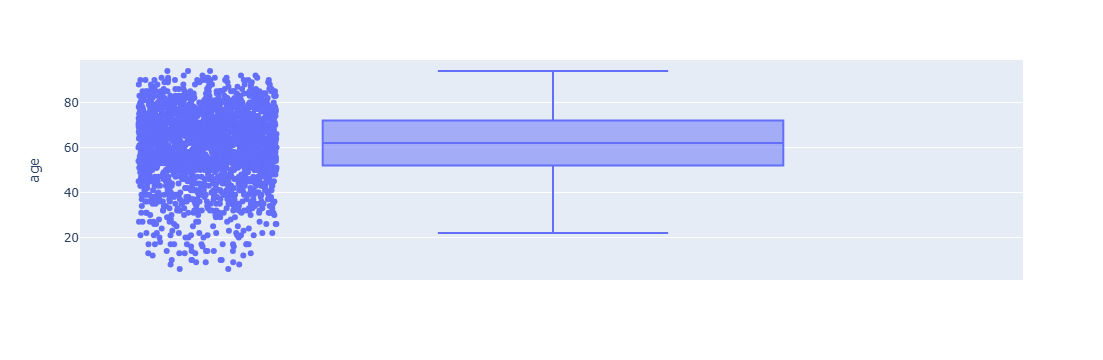

In [24]:
import plotly.express as px

# Create a box plot
fig = px.box(df, y="age", points="all")  # Use "column_name" as your numerical column
fig.show()


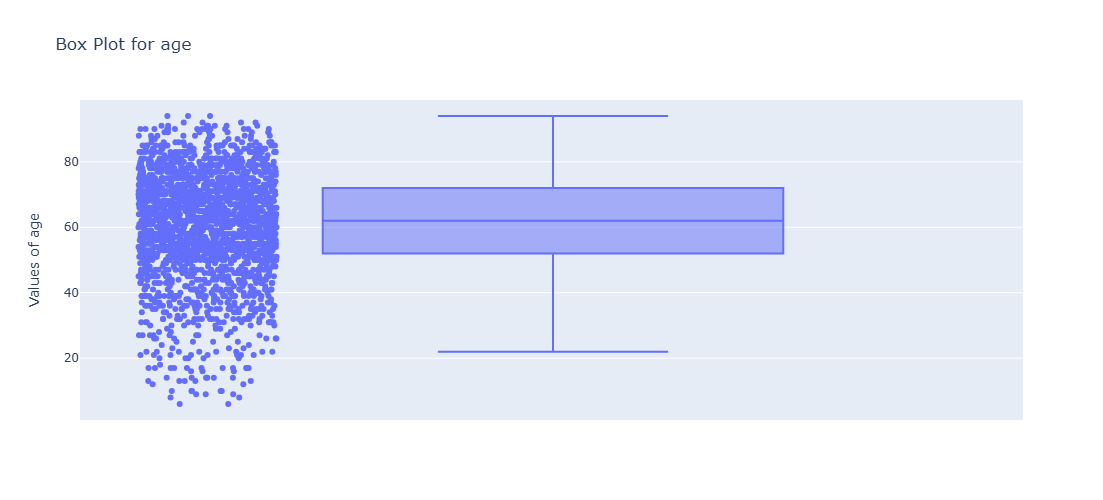

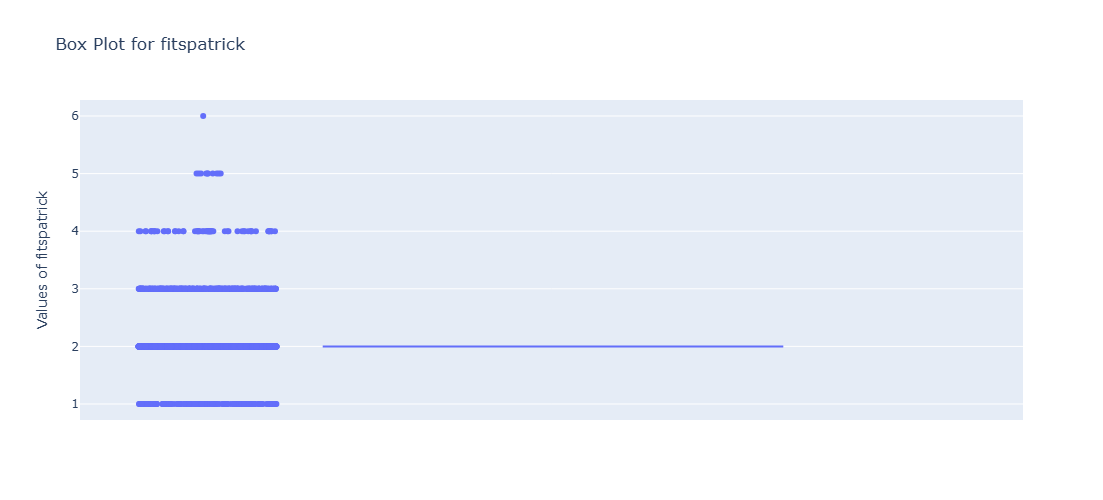

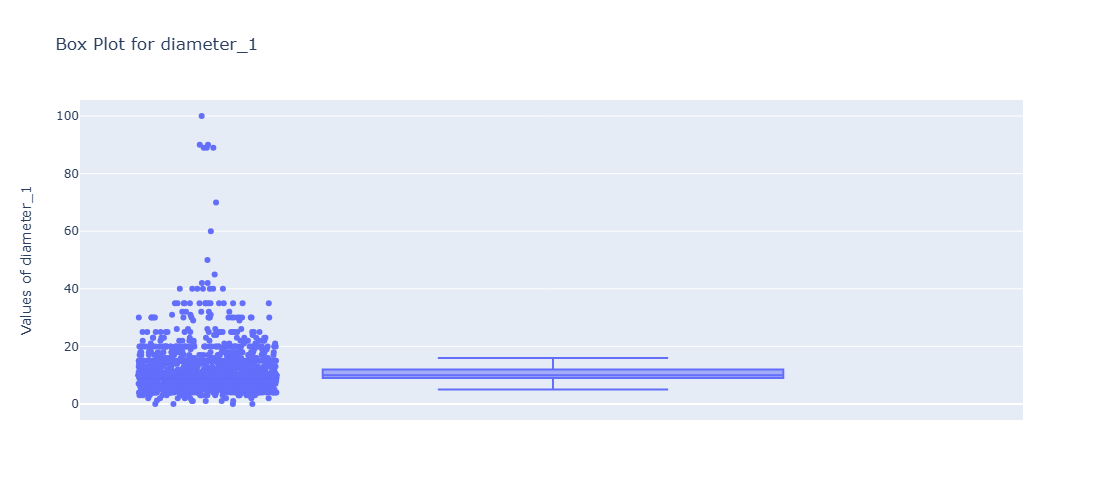

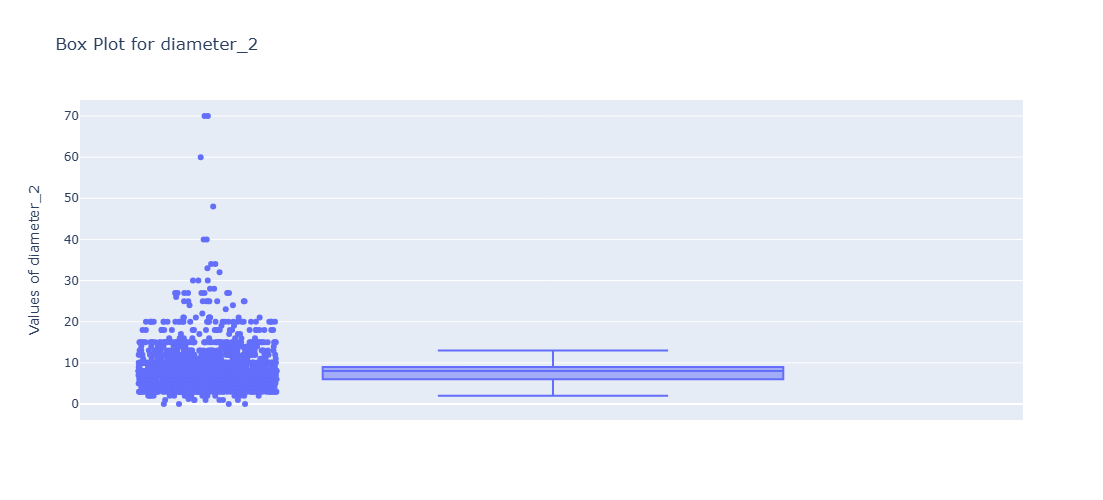

In [26]:
import plotly.express as px

# Define your numerical columns
num_col = ['age', 'fitspatrick', 'diameter_1', 'diameter_2']

# Iterate over each column and create a box plot
for col in num_col:
    fig = px.box(df, y=col, points="all", title=f'Box Plot for {col}', labels={col: f'Values of {col}'})
    
    # Update the layout to adjust the figure size
    fig.update_layout(
        width=800,  # Increase width
        height=500,  # Increase height
    )
    
    fig.show()
